In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json, math, time
from tqdm.notebook import tqdm_notebook
import tmdbsimple as tmdb
import os

In [2]:
yr_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
yr_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')
display(yr_2000, yr_2001)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1900.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,tt9383112,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10752, '...",NaN,391223.0,en,Dogs of War,...,0.0,1.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Dogs of War,0.0,4.6,4.0,NaN
2130,tt9529596,0.0,NaN,NaN,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",https://web.archive.org/web/20010501210000/htt...,374648.0,en,Banjo Gyro!,...,0.0,12.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Are you anxious to fathom the preposterous new...,Banjo Gyro!,0.0,6.7,3.0,R
2131,tt9602302,0.0,/gKN24wRvsq614uCfHXrycjaHZJf.jpg,NaN,0.0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 18,...",NaN,481267.0,zh,上车走吧,...,0.0,113.0,"[{'english_name': 'Mandarin', 'iso_639_1': 'zh...",Released,NaN,Mini-bus,0.0,8.5,2.0,NaN
2132,tt9624720,0.0,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,920958.0,en,Allan,...,0.0,15.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Allan,0.0,0.0,0.0,NaN


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/ab5yL8zgRotrICzGbEl10z24N71.jpg,NaN,48000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,If they lived in the same century they'd be pe...,Kate & Leopold,0.0,6.3,1126.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.0,3.0,NaN
3,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.6,116.0,PG-13
4,tt0118652,0.0,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,NaN,1000000.0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 27, '...",NaN,17140.0,en,The Attic Expeditions,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,0.0,5.1,28.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,tt9077500,0.0,NaN,NaN,0.0,[],NaN,552089.0,en,Bardo,...,0.0,13.0,[],Released,NaN,Bardo,0.0,0.0,0.0,NaN
2204,tt9358360,0.0,NaN,NaN,0.0,"[{'id': 10749, 'name': 'Romance'}]",NaN,564567.0,en,Forbidden Lust,...,0.0,43.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Is it passion... or is it madness?,Forbidden Lust,0.0,0.0,0.0,NR
2205,tt9632192,0.0,NaN,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",NaN,795324.0,en,The Wesley Willis Experience,...,0.0,10.0,[],Released,NaN,The Wesley Willis Experience,0.0,0.0,0.0,NaN
2206,tt9683070,0.0,NaN,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",NaN,580253.0,en,2001 NBA Champions: Los Angeles Lakers,...,0.0,70.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,2001 NBA Champions: Los Angeles Lakers,0.0,0.0,0.0,NaN


In [3]:
yr_2000_dropped =  yr_2000.iloc[1: , :]
yr_2001_dropped =  yr_2001.iloc[1: , :]

In [4]:
yrs = pd.concat((yr_2000_dropped, yr_2001_dropped), ignore_index = True)
yrs.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,4.4,7.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.1,1900.0,PG
4,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.9,46.0,R


In [5]:
yrs.to_csv("Data/tmdb_results_combined.csv.gz", compression="gzip", index=False)

In [6]:
df_yrs = yrs[["imdb_id", "budget", "revenue","certification"]]
df_yrs

,imdb_id,budget,revenue,certification
0,tt0113026,10000000.0,0.0,NaN
1,tt0113092,0.0,0.0,NaN
2,tt0116391,0.0,0.0,NaN
3,tt0118694,150000.0,12854953.0,PG
4,tt0118852,0.0,0.0,R
...,...,...,...,...
4335,tt9077500,0.0,0.0,NaN
4336,tt9358360,0.0,0.0,NR
4337,tt9632192,0.0,0.0,NaN
4338,tt9683070,0.0,0.0,NaN


In [7]:
# How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
# Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.


filter = (df_yrs["budget"]>0) | (df_yrs["revenue"]>0)
filter

0        True
1       False
2       False
3        True
4       False
        ...  
4335    False
4336    False
4337    False
4338    False
4339    False
Length: 4340, dtype: bool

In [8]:
plot_df = df_yrs[filter]
plot_df

,imdb_id,budget,revenue,certification
0,tt0113026,10000000.0,0.0,NaN
3,tt0118694,150000.0,12854953.0,PG
7,tt0119273,15000000.0,0.0,R
11,tt0120263,0.0,80334.0,NaN
12,tt0120467,120000.0,14904.0,R
...,...,...,...,...
4206,tt1203521,0.0,230000.0,NaN
4244,tt1764172,250000.0,0.0,NaN
4260,tt2262092,25000.0,0.0,NaN
4267,tt2564396,5.0,0.0,NaN


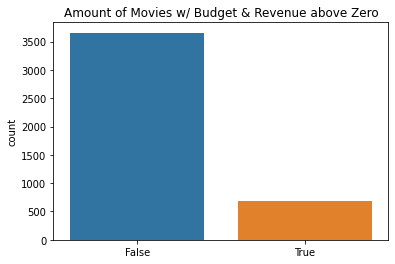

In [9]:
sns.countplot(x = filter)
plt.title('Amount of Movies w/ Budget & Revenue above Zero');

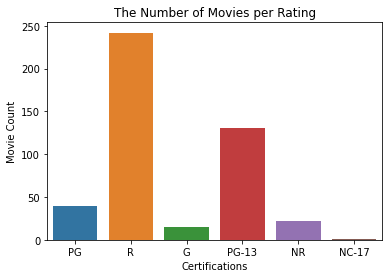

In [10]:
# How many movies are there in each of the certification categories (G/PG/PG-13/R)?
sns.countplot(x = 'certification', data = plot_df)
plt.xlabel('Certifications')
plt.ylabel('Movie Count')
plt.title('The Number of Movies per Rating');

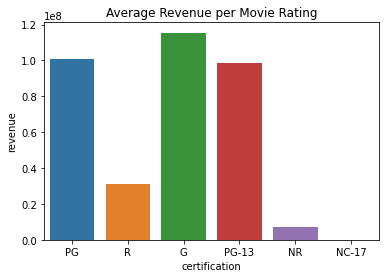

In [11]:
# What is the average revenue per certification category?
sns.barplot(data = plot_df, x='certification', y='revenue', ci = None)
plt.title('Average Revenue per Movie Rating');

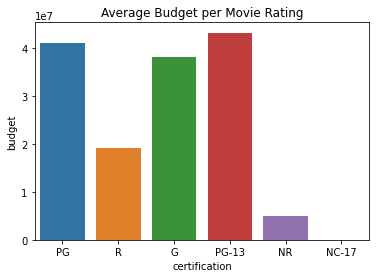

In [12]:
# What is the average budget per certification category?
sns.barplot(data = plot_df, x='certification', y='budget', ci = None)
plt.title('Average Budget per Movie Rating');